# Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [4]:
df=pd.read_csv('employee_performance_with_edu_correlation.csv')

# Exploratory Data Analysis (EDA)

### Dataset Overview

In [7]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,7250.0,33.0,32,0,2,0.0,14,76.0,2,4,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34.0,34,0,14,75.0,12,72.0,4,4,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,7850.0,37.0,27,0,3,NaN,10,10.0,1,3,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,6550.0,52.0,10,21,12,100.0,10,3.0,2,1,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,5550.0,38.0,11,15,13,100.0,15,12.0,2,1,False


In [8]:
df.tail()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,5150.0,55.0,46,0,3,75.0,16,63.0,4,3,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,9750.0,39.0,35,0,0,0.0,10,88.0,3,4,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,6800.0,31.0,13,0,5,0.0,5,91.0,2,2,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,10500.0,35.0,43,0,1,50.0,2,45.0,3,4,False
99999,100000,Finance,Female,43,Analyst,2024-03-04 08:03:05.556036,0,PhD,2,4400.0,51.0,43,26,11,75.0,13,59.0,1,1,False


In [9]:
df.size

2000000

In [10]:
df.shape

(100000, 20)

In [11]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          91951 non-null   float64
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [13]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,91951.000000,100000.000000,100000.000000,100000.000000,89975.000000,100000.000000,97035.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,3.154620,7522.228500,44.971583,24.431170,4.322250,7.008550,46.094749,10.013560,57.314979,2.197200,2.499530
std,28867.657797,11.244121,2.869336,1.407314,1548.250283,8.941265,14.469584,6.838178,4.331591,35.139883,5.495405,29.299516,1.105687,1.118022
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,6400.000000,37.000000,12.000000,0.000000,3.000000,25.000000,5.000000,32.000000,1.000000,1.000000
50%,50000.500000,41.000000,4.000000,3.000000,7500.000000,45.000000,24.000000,0.000000,7.000000,50.000000,10.000000,57.000000,2.000000,2.000000
75%,75000.250000,51.000000,7.000000,4.000000,8650.000000,53.000000,37.000000,7.000000,11.000000,75.000000,15.000000,82.000000,3.000000,3.000000
max,100000.000000,60.000000,10.000000,5.000000,11500.000000,60.000000,49.000000,33.000000,14.000000,100.000000,19.000000,115.000000,4.000000,4.000000


### Data Quality Checks

In [15]:
# Checking for missing values
df.isnull().sum()

Employee_ID                        0
Department                         0
Gender                             0
Age                                0
Job_Title                          0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Performance_Score                  0
Monthly_Salary                     0
Work_Hours_Per_Week             8049
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency          10025
Team_Size                          0
Training_Hours                  2965
Promotions                         0
Employee_Satisfaction_Score        0
Resigned                           0
dtype: int64

In [16]:
# Checking for duplicate values
df.duplicated().sum()

0

In [17]:
# Checking data types of columns
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week            float64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency          float64
Team_Size                        int64
Training_Hours                 float64
Promotions                       int64
Employee_Satisfaction_Score      int64
Resigned                          bool
dtype: object

### Data Visualization

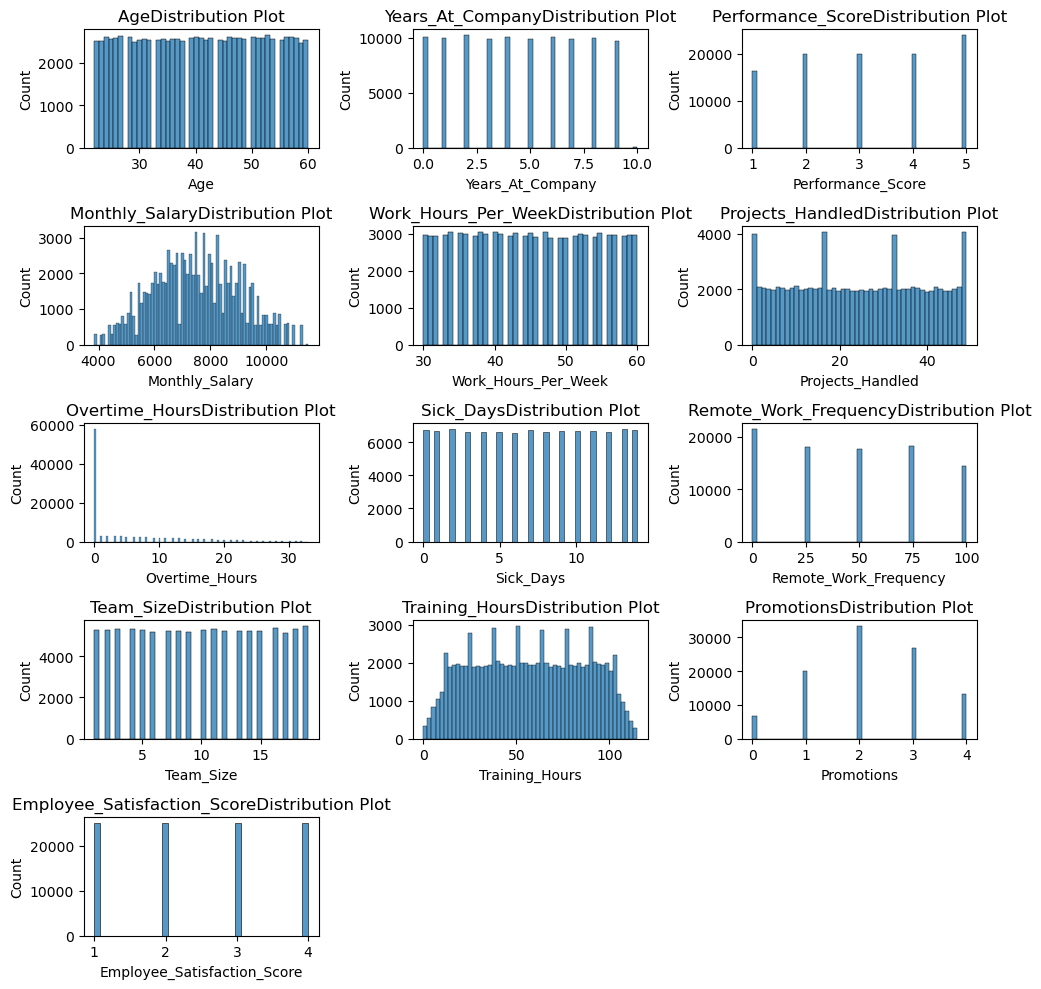

In [19]:
#numerical columns distribution analysis
numerical_col=df.select_dtypes(include='number').columns.tolist()
#removing employeeID column because it’s a random unique number, so its distribution is meaningless
if 'Employee_ID' in numerical_col:
    numerical_col.remove('Employee_ID')
# Plot histograms
plt.figure(figsize=(10,10))
for j,coli in enumerate(numerical_col):
    plt.subplot(5,3,j+1)
    sns.histplot(x=df[coli])
    plt.title(f'{coli}Distribution Plot')
plt.tight_layout()
plt.show()

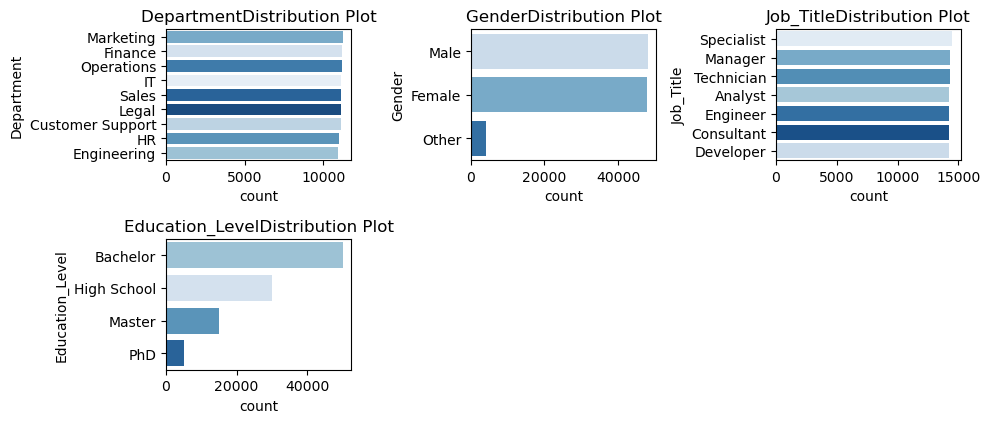

In [20]:
# Categorical column distribution analysis
categorical_col=df.select_dtypes(include='object').columns.tolist()
#removing Hire Date column
if 'Hire_Date' in categorical_col:
    categorical_col.remove('Hire_Date')
# Plot histograms   
plt.figure(figsize=(10,6))
for i,col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(y=df[col],hue=df[col],palette='Blues',order=df[col].value_counts().index)
    plt.title(f'{col}Distribution Plot')
plt.tight_layout()
plt.show()

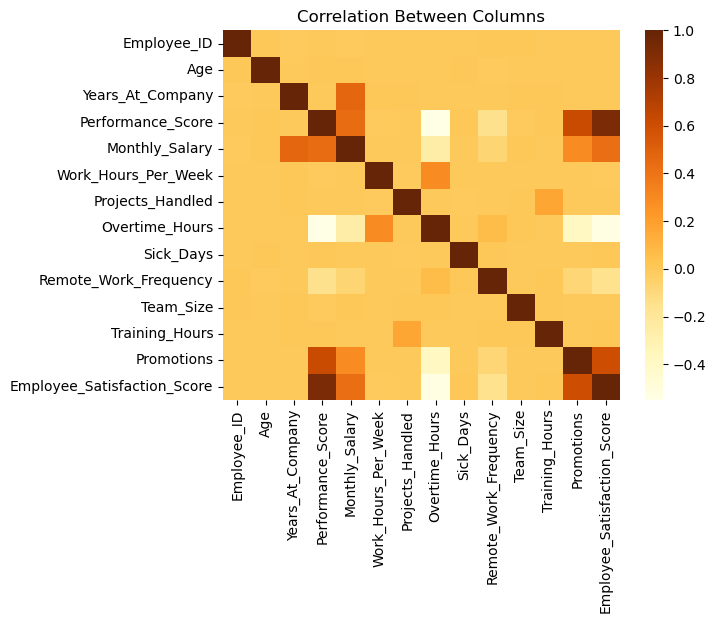

In [21]:
# correlation matrix
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='YlOrBr')
plt.title('Correlation Between Columns')
plt.show()

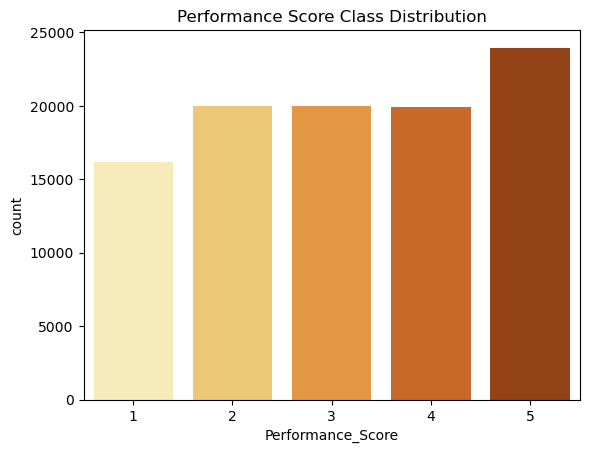

In [22]:
# class distribution plot
sns.barplot(df['Performance_Score'].value_counts(),palette='YlOrBr')
plt.title('Performance Score Class Distribution')
plt.show()

# Data Preprocess

### Handling Missing Values

In [25]:
df.isnull().sum()

Employee_ID                        0
Department                         0
Gender                             0
Age                                0
Job_Title                          0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Performance_Score                  0
Monthly_Salary                     0
Work_Hours_Per_Week             8049
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency          10025
Team_Size                          0
Training_Hours                  2965
Promotions                         0
Employee_Satisfaction_Score        0
Resigned                           0
dtype: int64

In [26]:
# Checking skew to choose the appropriate imputation
df['Work_Hours_Per_Week'].skew()

0.008331044238367611

In [27]:
df['Work_Hours_Per_Week']=df['Work_Hours_Per_Week'].fillna(df['Work_Hours_Per_Week'].mean())
df['Work_Hours_Per_Week'].isnull().sum()

0

In [28]:
df['Remote_Work_Frequency']=df['Remote_Work_Frequency'].fillna(df['Remote_Work_Frequency'].mode()[0])
df['Remote_Work_Frequency'].isnull().sum()

0

In [29]:
df['Training_Hours'].skew()

-0.003914371325005237

In [30]:
df['Training_Hours']=df['Training_Hours'].fillna(df['Training_Hours'].mean())
df['Training_Hours'].isnull().sum()

0

### Handling Outliers

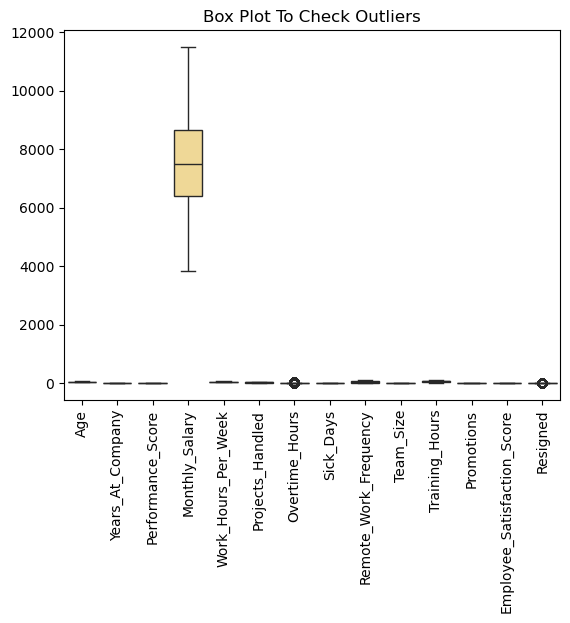

In [60]:
sns.boxplot(df.drop('Employee_ID', axis=1),palette='YlOrBr')
plt.title('Box Plot To Check Outliers')
plt.xticks(rotation=90)
plt.show()

In [57]:
df['Resigned'].unique()

array([False,  True])

In [64]:
Q1=df['Overtime_Hours'].quantile(0.25)
Q3=df['Overtime_Hours'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outliers=df['Overtime_Hours'][(df['Overtime_Hours']<lower_limit) | (df['Overtime_Hours']>upper_limit)]
outliers

3        21
18       26
23       22
26       19
30       18
         ..
99967    25
99972    18
99975    26
99994    29
99999    26
Name: Overtime_Hours, Length: 7269, dtype: int64

In [66]:
df['Overtime_Hours']=np.where(df['Overtime_Hours']<lower_limit,lower_limit,df['Overtime_Hours'])
df['Overtime_Hours']=np.where(df['Overtime_Hours']>upper_limit,upper_limit,df['Overtime_Hours'])

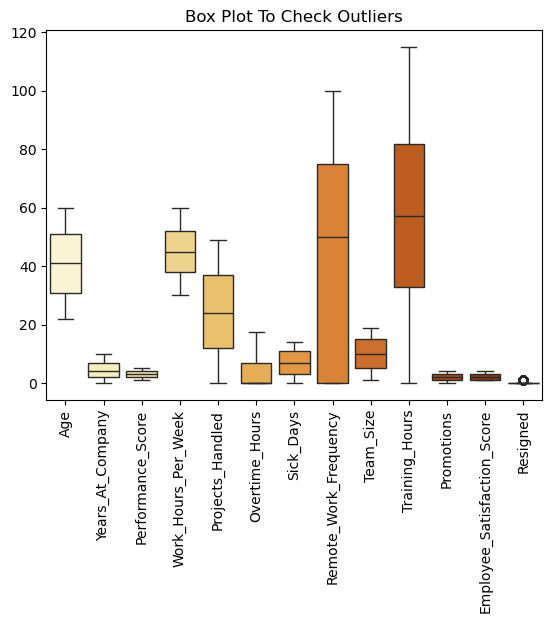

In [68]:
sns.boxplot(df.drop(columns=['Employee_ID','Monthly_Salary'], axis=1),palette='YlOrBr')
plt.title('Box Plot To Check Outliers')
plt.xticks(rotation=90)
plt.show()

### Encoding Categorical Variables

In [62]:
df1=df.copy()
le_dep=LabelEncoder()
le_gen=LabelEncoder()
le_job=LabelEncoder()
le_edu=LabelEncoder()
le_per=LabelEncoder()
le_rwf=LabelEncoder()
le_ess=LabelEncoder()
le_res=LabelEncoder()
df1['Department']=le_dep.fit_transform(df1['Department'])
df1['Gender']=le_gen.fit_transform(df1['Gender'])
df1['Job_Title']=le_job.fit_transform(df1['Job_Title'])
df1['Education_Level']=le_edu.fit_transform(df1['Education_Level'])
df1['Performance_Score']=le_per.fit_transform(df1['Performance_Score'])
df1['Remote_Work_Frequency']=le_rwf.fit_transform(df1['Remote_Work_Frequency'])
df1['Employee_Satisfaction_Score']=le_ess.fit_transform(df1['Employee_Satisfaction_Score'])
df1['Resigned']=le_res.fit_transform(df1['Resigned'])
df1.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,4,7250.0,33.0,32,0.0,2,0,14,76.0,2,3,0
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,4,7500.0,34.0,34,0.0,14,3,12,72.0,4,3,0
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,2,7850.0,37.0,27,0.0,3,0,10,10.0,1,2,0
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,0,1,6550.0,52.0,10,17.5,12,4,10,3.0,2,0,0
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,0,1,5550.0,38.0,11,15.0,13,4,15,12.0,2,0,0


### Feature Selection

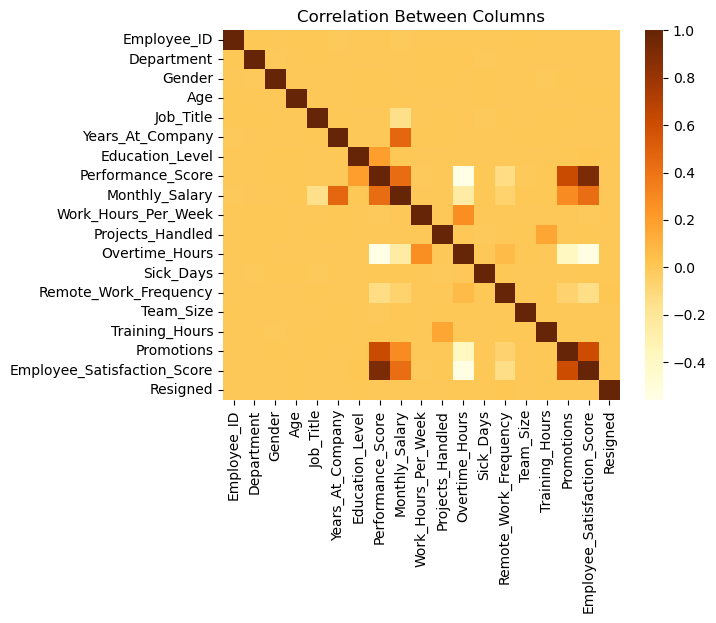

In [64]:
# Using correlation matrix to find relevent features
sns.heatmap(df1.select_dtypes(include='number').corr(),cmap='YlOrBr')
plt.title('Correlation Between Columns')
plt.show()

In [65]:
x=df1.drop(columns=['Employee_ID','Department','Gender','Age','Hire_Date','Sick_Days','Team_Size','Resigned','Performance_Score'])
y=df1['Performance_Score']

### Balancing Data

In [67]:
class_counts = y.value_counts()
majority_class = class_counts.max()  # Largest class count
minority_class = class_counts.min()  # Smallest class count
# Compute Imbalance Ratio (IR)
IR = round(majority_class / minority_class, 2)
print("Class Distribution:\n", class_counts)
print("\nImbalance Ratio (IR):", IR)

Class Distribution:
 Performance_Score
4    23955
1    19983
2    19975
3    19903
0    16184
Name: count, dtype: int64

Imbalance Ratio (IR): 1.48


In [68]:
#IR < 2 so there's no strong imbalance in the data

### Feature Scaling

In [70]:
ss=StandardScaler()
xss=ss.fit_transform(x)

### Splitting Data (Train-Test Split)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(xss,y,test_size=0.3,stratify=y,random_state=42)

# Model Training & Evaluation

#### LogisticRegression

In [82]:
lrc=LogisticRegression()
lrc.fit(x_train,y_train)
lrcy_pred=lrc.predict(x_test)

Training Accuracy:  0.7293571428571428
Testing Accuracy:  0.7284666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4855
           1       0.66      0.67      0.67      5995
           2       0.59      0.54      0.56      5993
           3       0.67      0.60      0.63      5971
           4       0.84      0.92      0.88      7186

    accuracy                           0.73     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.72      0.73      0.72     30000



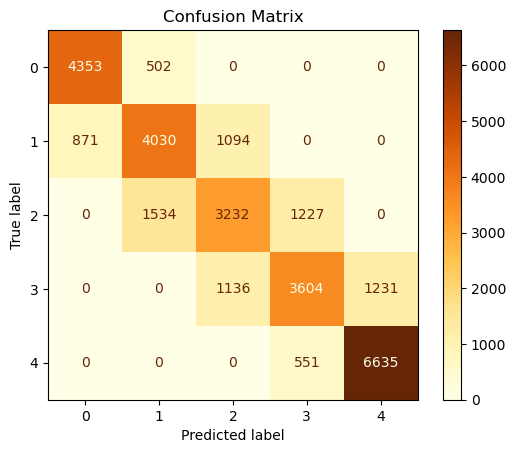

In [83]:
lrc_trs=lrc.score(x_train,y_train)
lrc_tss=accuracy_score(y_test,lrcy_pred)
print('Training Accuracy: ',lrc_trs)
print('Testing Accuracy: ',lrc_tss)
print('Classification Report: \n',classification_report(y_test,lrcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,lrcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### KNN

In [85]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knny_pred=knn.predict(x_test)

Training Accuracy:  0.8333142857142857
Testing Accuracy:  0.7356666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4855
           1       0.65      0.67      0.66      5995
           2       0.59      0.52      0.55      5993
           3       0.71      0.62      0.66      5971
           4       0.85      0.94      0.89      7186

    accuracy                           0.74     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.73      0.74      0.73     30000



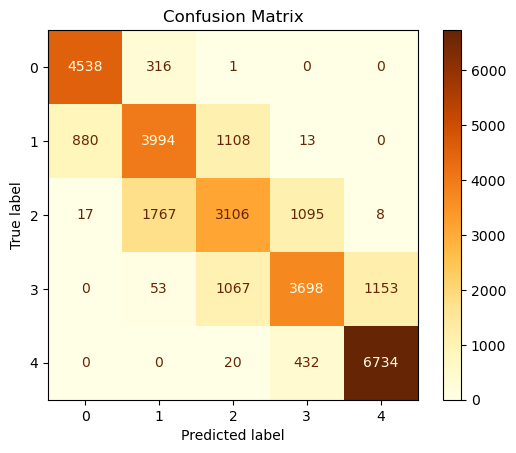

In [86]:
knn_trs=knn.score(x_train,y_train)
knn_tss=accuracy_score(y_test,knny_pred)
print('Training Accuracy: ',knn_trs)
print('Testing Accuracy: ',knn_tss)
print('Classification Report: \n',classification_report(y_test,knny_pred))
ConfusionMatrixDisplay.from_predictions(y_test,knny_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### GaussianNB

In [88]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnby_pred=gnb.predict(x_test)

Training Accuracy:  0.6658
Testing Accuracy:  0.6654
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      4855
           1       0.60      0.31      0.41      5995
           2       0.53      0.53      0.53      5993
           3       0.61      0.66      0.63      5971
           4       0.86      0.86      0.86      7186

    accuracy                           0.67     30000
   macro avg       0.65      0.67      0.64     30000
weighted avg       0.66      0.67      0.65     30000



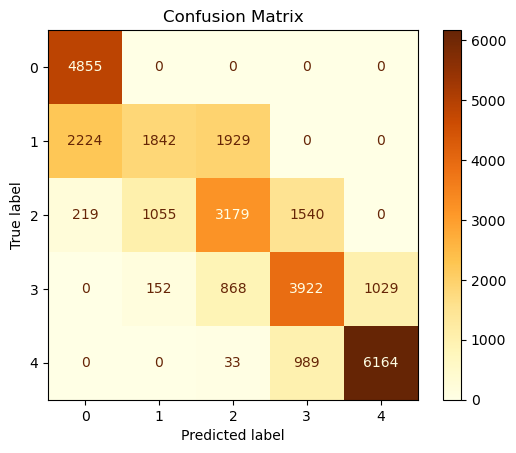

In [109]:
gnb_trs=gnb.score(x_train,y_train)
gnb_tss=accuracy_score(y_test,gnby_pred)
print('Training Accuracy: ',gnb_trs)
print('Testing Accuracy: ',gnb_tss)
print('Classification Report: \n',classification_report(y_test,gnby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,gnby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### SVC

In [111]:
'''svc=SVC()
svc.fit(x_train,y_train)
svcy_pred=svc.predict(x_test)'''

'svc=SVC()\nsvc.fit(x_train,y_train)\nsvcy_pred=svc.predict(x_test)'

In [112]:
'''svc_trs=svc.score(x_train,y_train)
svc_tss=accuracy_score(y_test,svcy_pred)
print('Training Accuracy: ',svc_trs)
print('Testing Accuracy: ',svc_tss)
print('Classification Report: \n',classification_report(y_test,svcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,svcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()'''

"svc_trs=svc.score(x_train,y_train)\nsvc_tss=accuracy_score(y_test,svcy_pred)\nprint('Training Accuracy: ',svc_trs)\nprint('Testing Accuracy: ',svc_tss)\nprint('Classification Report: \n',classification_report(y_test,svcy_pred))\nConfusionMatrixDisplay.from_predictions(y_test,svcy_pred,cmap='YlOrBr')\nplt.title('Confusion Matrix')\nplt.show()"

#### DecisionTreeClassifier

In [114]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcy_pred=dtc.predict(x_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9765333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4855
           1       0.97      0.97      0.97      5995
           2       0.96      0.96      0.96      5993
           3       0.97      0.97      0.97      5971
           4       0.99      0.99      0.99      7186

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



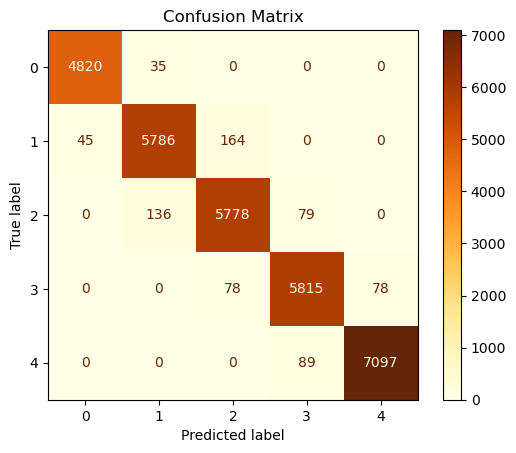

In [115]:
dtc_trs=dtc.score(x_train,y_train)
dtc_tss=accuracy_score(y_test,dtcy_pred)
print('Training Accuracy: ',dtc_trs)
print('Testing Accuracy: ',dtc_tss)
print('Classification Report: \n',classification_report(y_test,dtcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,dtcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### RandomForestClassifier

In [117]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcy_pred=rfc.predict(x_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9196
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      4855
           1       0.89      0.91      0.90      5995
           2       0.94      0.84      0.89      5993
           3       0.94      0.85      0.89      5971
           4       0.92      0.99      0.96      7186

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000



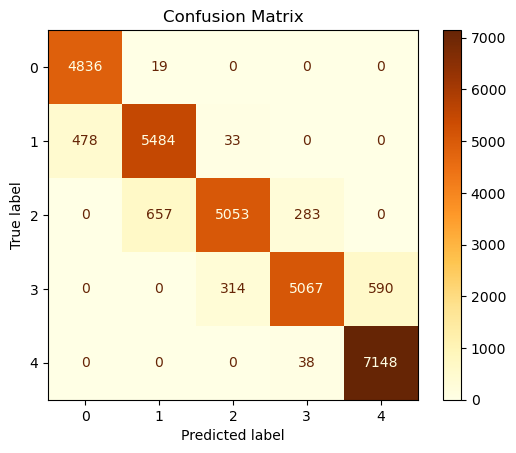

In [118]:
rfc_trs=rfc.score(x_train,y_train)
rfc_tss=accuracy_score(y_test,rfcy_pred)
print('Training Accuracy: ',rfc_trs)
print('Testing Accuracy: ',rfc_tss)
print('Classification Report: \n',classification_report(y_test,rfcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,rfcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### AdaBoost

In [120]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
adby_pred=adb.predict(x_test)

Training Accuracy:  0.6189285714285714
Testing Accuracy:  0.6202666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      4855
           1       0.00      0.00      0.00      5995
           2       0.44      0.55      0.49      5993
           3       0.56      0.70      0.62      5971
           4       0.84      0.88      0.86      7186

    accuracy                           0.62     30000
   macro avg       0.50      0.62      0.55     30000
weighted avg       0.50      0.62      0.55     30000



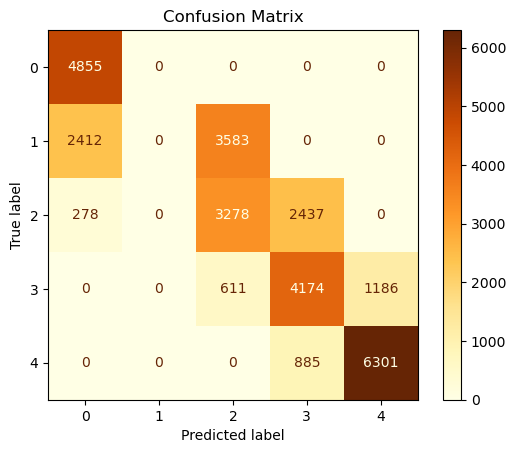

In [121]:
adb_trs=adb.score(x_train,y_train)
adb_tss=accuracy_score(y_test,adby_pred)
print('Training Accuracy: ',adb_trs)
print('Testing Accuracy: ',adb_tss)
print('Classification Report: \n',classification_report(y_test,adby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,adby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### GradientBoost

In [123]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbcy_pred=gbc.predict(x_test)

Training Accuracy:  0.857
Testing Accuracy:  0.8533333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      4855
           1       0.80      0.90      0.85      5995
           2       0.86      0.63      0.73      5993
           3       0.83      0.74      0.78      5971
           4       0.88      0.99      0.93      7186

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



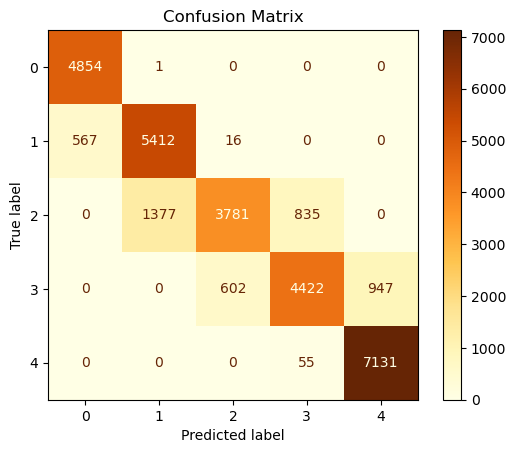

In [124]:
gbc_trs=gbc.score(x_train,y_train)
gbc_tss=accuracy_score(y_test,gbcy_pred)
print('Training Accuracy: ',gbc_trs)
print('Testing Accuracy: ',gbc_tss)
print('Classification Report: \n',classification_report(y_test,gbcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,gbcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### XGBClassifier

In [126]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgby_pred=xgb.predict(x_test)

Training Accuracy:  0.9992285714285715
Testing Accuracy:  0.9985
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4855
           1       0.99      1.00      1.00      5995
           2       1.00      0.99      1.00      5993
           3       1.00      1.00      1.00      5971
           4       1.00      1.00      1.00      7186

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



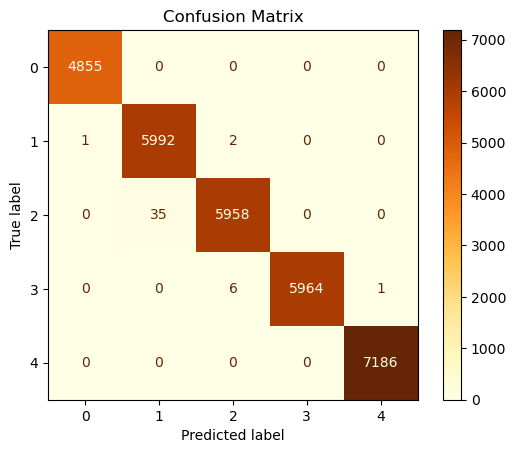

In [127]:
xgb_trs=xgb.score(x_train,y_train)
xgb_tss=accuracy_score(y_test,xgby_pred)
print('Training Accuracy: ',xgb_trs)
print('Testing Accuracy: ',xgb_tss)
print('Classification Report: \n',classification_report(y_test,xgby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,xgby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

# Model Performance Results

In [129]:
Tuned=pd.DataFrame({'Model':['LogisticRegression','KNN','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','AdaBoost','GradientBoost','XGBoost'],
                    'Original Training Score':[lrc_trs,knn_trs,gnb_trs,dtc_trs,rfc_trs,adb_trs,gbc_trs,xgb_trs],
                    'Original Accuracy Score':[lrc_tss,knn_tss,gnb_tss,dtc_tss,rfc_tss,adb_tss,gbc_tss,xgb_tss]})
Tuned.sort_values(by='Original Accuracy Score', ascending=False)

,Model,Original Training Score,Original Accuracy Score
7,XGBoost,0.999229,0.998500
3,DecisionTreeClassifier,1.000000,0.976533
4,RandomForestClassifier,1.000000,0.919600
6,GradientBoost,0.857000,0.853333
1,KNN,0.833314,0.735667
0,LogisticRegression,0.729357,0.728467
2,GaussianNB,0.665800,0.665400
5,AdaBoost,0.618929,0.620267


# Hyperparameter Tuning

#### Logistic Regression

In [131]:
lrc_param_grid={
    'class_weight': ['balanced'],
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lrc_gs=GridSearchCV(estimator=lrc,param_grid=lrc_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
lrc_gs.fit(x_train,y_train)
print('Best Parameters: ',lrc_gs.best_params_)
print('Best Accuracy: ',lrc_gs.best_score_)
lrc_bm=lrc_gs.best_estimator_
lrcy_pred_bm=lrc_bm.predict(x_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy:  0.7285428571428572


Training Accuracy:  0.7290428571428571
Testing Accuracy:  0.7276333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      4855
           1       0.67      0.65      0.66      5995
           2       0.59      0.54      0.57      5993
           3       0.66      0.62      0.64      5971
           4       0.85      0.90      0.88      7186

    accuracy                           0.73     30000
   macro avg       0.72      0.73      0.72     30000
weighted avg       0.72      0.73      0.72     30000



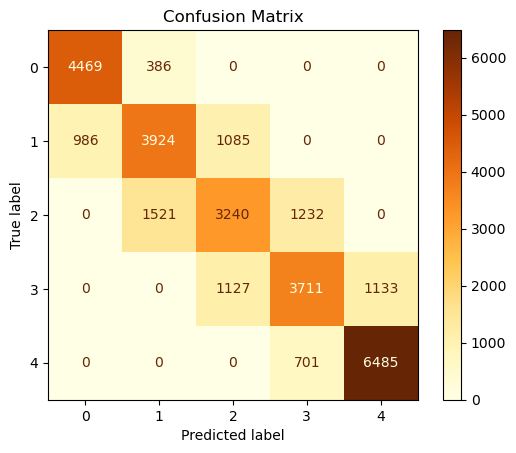

In [132]:
lrc_bm_trs=lrc_bm.score(x_train,y_train)
lrc_bm_tss=accuracy_score(y_test,lrcy_pred_bm)
print('Training Accuracy: ',lrc_bm_trs)
print('Testing Accuracy: ',lrc_bm_tss)
print('Classification Report: \n',classification_report(y_test,lrcy_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,lrcy_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### KNN

In [133]:
knn_param_grid={
    'n_neighbors': [5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
knn_gs=GridSearchCV(estimator=knn,param_grid=knn_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
knn_gs.fit(x_train,y_train)
print('Best Parameters: ',knn_gs.best_params_)
print('Best Accuracy: ',knn_gs.best_score_)
knn_bm=knn_gs.best_estimator_
knny_pred_bm=knn_bm.predict(x_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy:  0.7861714285714285


Training Accuracy:  1.0
Testing Accuracy:  0.7906666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4855
           1       0.74      0.73      0.73      5995
           2       0.68      0.59      0.63      5993
           3       0.76      0.70      0.73      5971
           4       0.86      0.97      0.91      7186

    accuracy                           0.79     30000
   macro avg       0.78      0.79      0.79     30000
weighted avg       0.78      0.79      0.79     30000



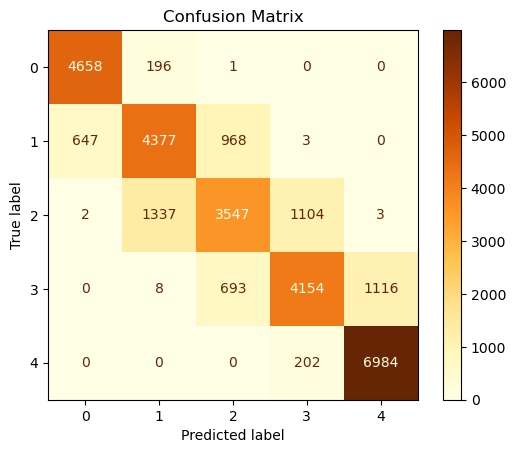

In [134]:
knn_bm_trs=knn_bm.score(x_train,y_train)
knn_bm_tss=accuracy_score(y_test,knny_pred_bm)
print('Training Accuracy: ',knn_bm_trs)
print('Testing Accuracy: ',knn_bm_tss)
print('Classification Report: \n',classification_report(y_test,knny_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,knny_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### GaussianNB

In [138]:
gnb_param_grid={
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gnb_gs=GridSearchCV(estimator=gnb,param_grid=gnb_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
gnb_gs.fit(x_train,y_train)
print('Best Parameter: ',gnb_gs.best_params_)
print('Best Accuracy: ',gnb_gs.best_score_)
gnb_bm=gnb_gs.best_estimator_
gnby_pred_bm=gnb_bm.predict(x_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameter:  {'var_smoothing': 1e-05}
Best Accuracy:  0.6708142857142857


Training Accuracy:  0.6710857142857143
Testing Accuracy:  0.6702
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      1.00      0.82      4855
           1       0.60      0.33      0.43      5995
           2       0.53      0.53      0.53      5993
           3       0.61      0.66      0.63      5971
           4       0.86      0.86      0.86      7186

    accuracy                           0.67     30000
   macro avg       0.66      0.68      0.65     30000
weighted avg       0.66      0.67      0.65     30000



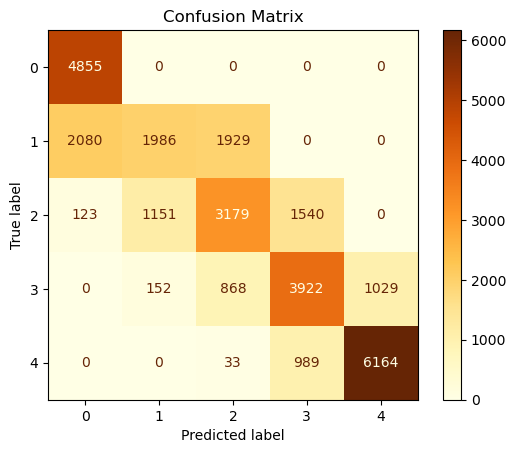

In [148]:
gnb_bm_trs=gnb_bm.score(x_train,y_train)
gnb_bm_tss=accuracy_score(y_test,gnby_pred_bm)
print('Training Accuracy: ',gnb_bm_trs)
print('Testing Accuracy: ',gnb_bm_tss)
print('Classification Report: \n',classification_report(y_test,gnby_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,gnby_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree

In [149]:
dtc_param_grid={
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}
dtc_gs=GridSearchCV(estimator=dtc,param_grid=dtc_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
dtc_gs.fit(x_train,y_train)
print('Best Parameter: ',dtc_gs.best_params_)
print('Best Accuracy: ',dtc_gs.best_score_)
dtc_bm=dtc_gs.best_estimator_
dtcy_pred_bm=dtc_bm.predict(x_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameter:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.9759285714285715


Training Accuracy:  0.9976857142857143
Testing Accuracy:  0.9799666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4855
           1       0.98      0.98      0.98      5995
           2       0.97      0.97      0.97      5993
           3       0.97      0.97      0.97      5971
           4       0.99      0.99      0.99      7186

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



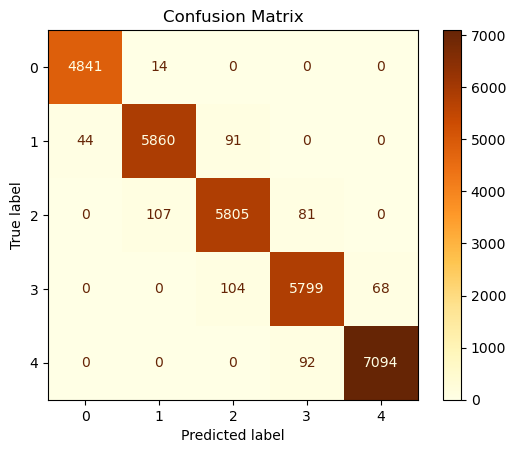

In [150]:
dtc_bm_trs=dtc_bm.score(x_train,y_train)
dtc_bm_tss=accuracy_score(y_test,dtcy_pred_bm)
print('Training Accuracy: ',dtc_bm_trs)
print('Testing Accuracy: ',dtc_bm_tss)
print('Classification Report: \n',classification_report(y_test,dtcy_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,dtcy_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest

In [151]:
rfc_param_grid={
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}
rfc_gs=GridSearchCV(estimator=rfc,param_grid=rfc_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
rfc_gs.fit(x_train,y_train)
print('Best Parameter: ',rfc_gs.best_params_)
print('Best Accuracy: ',rfc_gs.best_score_)
rfc_bm=rfc_gs.best_estimator_
rfcy_pred_bm=rfc_bm.predict(x_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameter:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy:  0.9031571428571429


Training Accuracy:  0.9809714285714286
Testing Accuracy:  0.9005333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      4855
           1       0.87      0.91      0.89      5995
           2       0.93      0.78      0.85      5993
           3       0.90      0.82      0.86      5971
           4       0.91      0.99      0.95      7186

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



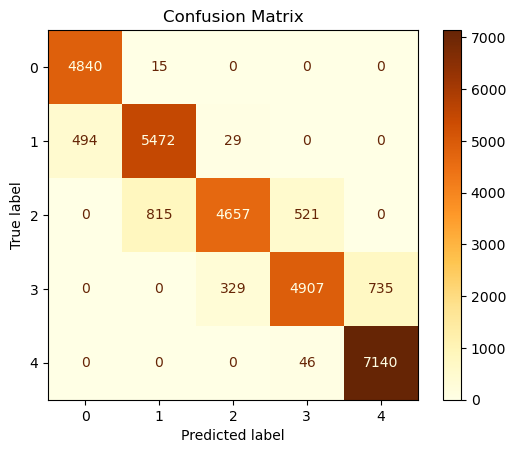

In [152]:
rfc_bm_trs=rfc_bm.score(x_train,y_train)
rfc_bm_tss=accuracy_score(y_test,rfcy_pred_bm)
print('Training Accuracy: ',rfc_bm_trs)
print('Testing Accuracy: ',rfc_bm_tss)
print('Classification Report: \n',classification_report(y_test,rfcy_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,rfcy_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### Adaboost

In [153]:
adb_param_grid={
    "n_estimators": [50, 100],  # Number of weak learners
    "learning_rate": [0.01, 0.1, 0.5],  # Controls contribution of each classifier
    "estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)] # Decision tree depth
}
adb_gs=GridSearchCV(estimator=adb,param_grid=adb_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
adb_gs.fit(x_train,y_train)
print('Best Parameter: ',adb_gs.best_params_)
print('Best Accuracy: ',adb_gs.best_score_)
adb_bm=adb_gs.best_estimator_
adby_pred_bm=adb_bm.predict(x_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameter:  {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy:  0.7200142857142857


Training Accuracy:  0.7196428571428571
Testing Accuracy:  0.7197666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4855
           1       0.64      0.80      0.71      5995
           2       0.59      0.15      0.24      5993
           3       0.61      0.65      0.63      5971
           4       0.83      1.00      0.91      7186

    accuracy                           0.72     30000
   macro avg       0.70      0.72      0.68     30000
weighted avg       0.70      0.72      0.68     30000



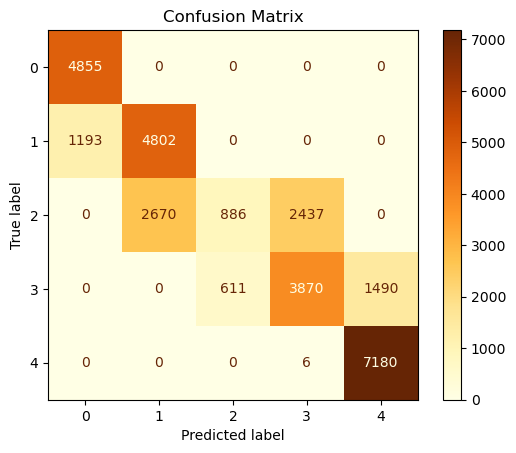

In [154]:
adb_bm_trs=adb_bm.score(x_train,y_train)
adb_bm_tss=accuracy_score(y_test,adby_pred_bm)
print('Training Accuracy: ',adb_bm_trs)
print('Testing Accuracy: ',adb_bm_tss)
print('Classification Report: \n',classification_report(y_test,adby_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,adby_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### Gradient Boost

In [155]:
gbc_param_grid={
    "n_estimators": [50, 100], # Number of trees in the ensemble
    "learning_rate": [0.05, 0.1], # Controls step size
    "max_depth": [3],  # Depth of each tree
    "subsample": [0.8],  # Fraction of data used per tree
    "min_samples_split": [2],  # Minimum samples to split a node
    "min_samples_leaf": [1]  # Minimum samples in a leaf node
}
gbc_gs=GridSearchCV(estimator=gbc,param_grid=gbc_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
gbc_gs.fit(x_train,y_train)
print('Best Parameter: ',gbc_gs.best_params_)
print('Best Accuracy: ',gbc_gs.best_score_)
gbc_bm=gbc_gs.best_estimator_
gbcy_pred_bm=gbc_bm.predict(x_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameter:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy:  0.8526


Training Accuracy:  0.8545571428571429
Testing Accuracy:  0.8507
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      4855
           1       0.80      0.91      0.85      5995
           2       0.86      0.61      0.72      5993
           3       0.82      0.74      0.78      5971
           4       0.88      0.99      0.93      7186

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.84     30000
weighted avg       0.85      0.85      0.84     30000



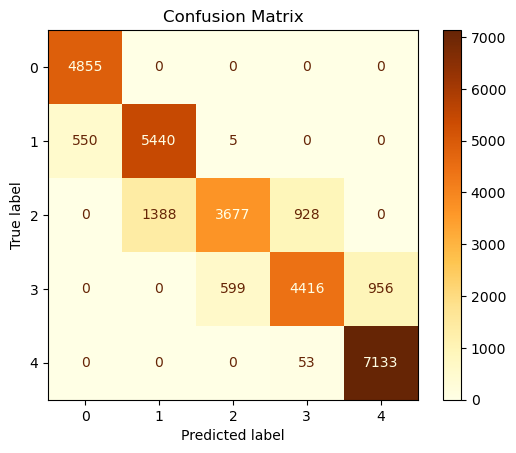

In [156]:
gbc_bm_trs=gbc_bm.score(x_train,y_train)
gbc_bm_tss=accuracy_score(y_test,gbcy_pred_bm)
print('Training Accuracy: ',gbc_bm_trs)
print('Testing Accuracy: ',gbc_bm_tss)
print('Classification Report: \n',classification_report(y_test,gbcy_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,gbcy_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### Xgboost

In [157]:
xgb_param_grid={
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
}
xgb_gs=GridSearchCV(estimator=xgb,param_grid=xgb_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
xgb_gs.fit(x_train,y_train)
print('Best Parameters: ',xgb_gs.best_params_)
print('Best Accuracy: ',xgb_gs.best_score_)
xgb_bm=xgb_gs.best_estimator_
xgby_pred_bm=xgb_bm.predict(x_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy:  0.9973428571428571


Training Accuracy:  0.9985285714285714
Testing Accuracy:  0.9978
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4855
           1       0.99      1.00      1.00      5995
           2       1.00      0.99      0.99      5993
           3       1.00      1.00      1.00      5971
           4       1.00      1.00      1.00      7186

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



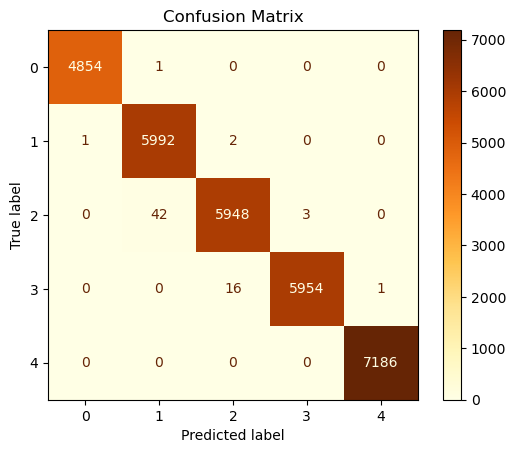

In [158]:
xgb_bm_trs=xgb_bm.score(x_train,y_train)
xgb_bm_tss=accuracy_score(y_test,xgby_pred_bm)
print('Training Accuracy: ',xgb_bm_trs)
print('Testing Accuracy: ',xgb_bm_tss)
print('Classification Report: \n',classification_report(y_test,xgby_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,xgby_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuned vs Normal Model Performance Results

In [160]:
Tuned=pd.DataFrame({'Model':['LogisticRegression','KNN','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','AdaBoost','GradientBoost','XGBoost'],
                    'Original Training Score':[lrc_trs,knn_trs,gnb_trs,dtc_trs,rfc_trs,adb_trs,gbc_trs,xgb_trs],
                    'Original Accuracy Score':[lrc_tss,knn_tss,gnb_tss,dtc_tss,rfc_tss,adb_tss,gbc_tss,xgb_tss],
                   'Hyper Tuned Training Score':[lrc_bm_trs,knn_bm_trs,gnb_bm_trs,dtc_bm_trs,rfc_bm_trs,adb_bm_trs,gbc_bm_trs,xgb_bm_trs],
                   'Hyper Tuned Accuracy Score':[lrc_bm_tss,knn_bm_tss,gnb_bm_tss,dtc_bm_tss,rfc_bm_tss,adb_bm_tss,gbc_bm_tss,xgb_bm_tss]})
Tuned.sort_values(by=['Original Accuracy Score','Hyper Tuned Accuracy Score'], ascending=[False, False])

,Model,Original Training Score,Original Accuracy Score,Hyper Tuned Training Score,Hyper Tuned Accuracy Score
7,XGBoost,0.999229,0.998500,0.998529,0.997800
3,DecisionTreeClassifier,1.000000,0.976533,0.997686,0.979967
4,RandomForestClassifier,1.000000,0.919600,0.980971,0.900533
6,GradientBoost,0.857000,0.853333,0.854557,0.850700
1,KNN,0.833314,0.735667,1.000000,0.790667
0,LogisticRegression,0.729357,0.728467,0.729043,0.727633
2,GaussianNB,0.665800,0.665400,0.671086,0.670200
5,AdaBoost,0.618929,0.620267,0.719643,0.719767


# Model Deployment

In [162]:
joblib.dump(xgb_bm,r'C:\Users\HP\PerformanceModel.pkl')
joblib.dump(le_job,r'C:\Users\HP\LabelEncoder_Job.pkl')
joblib.dump(le_edu,r'C:\Users\HP\LabelEncoder_Edu.pkl')
joblib.dump(le_per,r'C:\Users\HP\LabelEncoder_Per.pkl')
joblib.dump(le_rwf,r'C:\Users\HP\LabelEncoder_Rwf.pkl')
joblib.dump(le_ess,r'C:\Users\HP\LabelEncoder_Ess.pkl')
joblib.dump(ss,r'C:\Users\HP\StandardScaler1.pkl')

['C:\\Users\\HP\\StandardScaler1.pkl']